# Get UKIDSS and SDSS

This notebook
- records the data download process for UKIDSS and SDSS
- plots the overall galaxy sample features

### Data Download

UKIDSS allows for [SQL access](http://wsa.roe.ac.uk/dbaccess.html). The most relevant table is LASsources. However, it's not obvious how to use the SQL form to search against **another** database. They do provide a [crossmatch form](http://wsa.roe.ac.uk/crossID_notes.html) that searches against a set of user-provided co-ordinates, but only up to a limit of 50,000. It seems easier to use a third party service.


UKIDSS and SDSS were downloaded via the CDS X-Match service available from cdsxmatch.u-strasbg.fr/xmatch. 

The latest available catalogs on X-Match via Vizier were UKIDSS-DR9 LAS+GCS+DXS and SDSS DR12.


#### UKIDSS-DR9 LAS

LAS: Large Area Survey, 4000 sq degrees of extragalactic observations matched to the SDSS footprint
See more here: http://www.ukidss.org/surveys/surveys.html


The latest UKIDSS release is DR10. 

*TODO: is there anything significant missing/added?*

#### SDSS DR12

The latest SDSS release is DR14.

*TODO: is there anything significant missing/added?*


### Running the Download


The download found 217,540,070 matching rows at a fixed seperation of 5 arcseconds. The combined file was 63.4GB. 




This is from Vizier direct table service: http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=V/147

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# sdss_loc = 'data/sdss_galaxies_zsph_max_0p5_1k.csv'  # test 1k
sdss_loc = 'data/sdss_galaxies_zsph_max_0p5.csv'  # full catalog, a few seconds to laod

In [10]:
df = pd.read_csv(sdss_loc, sep='\t')[2:].reset_index(drop=True)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,1,2,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,RA_ICRS,DE_ICRS,mode,q_mode,class,SDSS12,m_SDSS12,ObsDate,Q,umag,...,rmag,e_rmag,imag,e_imag,zmag,e_zmag,zsp,zph,e_zph,<zph>
0,044.991889,+00.040779,1,+,3,J025958.05+000226.8,*,2003.8858,3,23.206,...,20.132,0.042,19.491,0.034,18.978,0.094,0.46846,0.3671,0.0447,0.3701
1,044.997801,+00.063080,1,+,3,J025959.47+000347.0,*,2003.8858,3,21.740,...,20.272,0.024,19.966,0.026,19.630,0.079,0.37803,0.2365,0.0735,0.2493
2,044.955188,+00.054225,1,,3,J025949.24+000315.2,*,2003.8858,3,21.723,...,19.729,0.033,19.415,0.038,19.264,0.133,0.37611,0.3736,0.0729,0.3343
3,044.961076,+00.077095,1,+,3,J025950.65+000437.5,*,2003.8858,3,21.148,...,19.501,0.020,19.053,0.020,19.014,0.073,0.13947,0.1349,0.0347,0.1377
4,044.931939,+00.077110,1,+,3,J025943.66+000437.5,*,2003.8858,3,19.892,...,18.604,0.014,18.386,0.016,18.351,0.062,0.12753,0.1043,0.0391,0.1085


In [11]:
df = df.sample(10000)  # keep things manageable

In [15]:
df['zsp'] = pd.to_numeric(df['zsp'], errors='coerce')

In [16]:
len(df)

10000

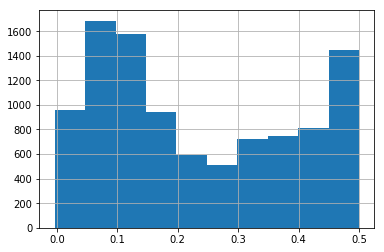

In [17]:
df['zsp'].hist()